Print versions of modules

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys

print("Python version:", sys.version)
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib verion:", matplotlib.__version__)

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
numpy version: 1.26.4
pandas version: 2.2.2
matplotlib verion: 3.9.2


## Part 1: Data Cleaning & Preprocessing Tasks

### Fetch the data

In [38]:
df = pd.read_csv("C:/Users/kamiq/Downloads/Sensor_Monitoring_DataFrame.csv", encoding = "UTF-8", parse_dates = ["datetime"])
df

,datetime,sensor_id,temperature,pressure,vibration,humidity,voltage,current,efficiency,runtime,throughput,status
0,2023-01-01 00:00:00,SENSOR_0,25.993428,100.471005,0.065140,36.430396,219.679308,4.889373,0.972186,4420.0,22.0,WARN
1,2023-01-01 00:00:00,SENSOR_1,24.723471,100.739819,0.031557,NaN,221.643812,4.861593,0.865761,2749.0,23.0,FAIL
2,2023-01-01 00:00:00,SENSOR_2,26.295377,102.047294,NaN,63.285367,221.606786,5.153703,0.948516,1682.0,26.0,OK
3,2023-01-01 08:00:00,SENSOR_0,28.046060,101.910370,0.077113,50.298709,222.109604,5.407869,0.925698,4906.0,18.0,OK
4,2023-01-01 08:00:00,SENSOR_1,24.531693,101.279098,0.058269,NaN,228.068556,NaN,0.863515,4637.0,13.0,OK
...,...,...,...,...,...,...,...,...,...,...,...,...
301,2023-01-17 16:00:00,SENSOR_0,25.500986,101.237321,0.031535,48.092731,220.960246,4.632704,NaN,2228.0,17.0,OK
302,2023-01-12 08:00:00,SENSOR_1,23.395445,101.346981,0.021831,49.197553,213.150985,4.115780,0.949965,2590.0,24.0,OK
303,2023-01-02 00:00:00,SENSOR_0,26.085120,101.097807,0.079921,40.392143,213.861961,5.803673,0.933770,1276.0,20.0,OK
304,2023-01-20 08:00:00,SENSOR_2,25.026004,101.876557,0.035457,40.307316,222.682549,4.758628,0.974614,4797.0,16.0,OK


### Check for missing values

In [41]:
df.isna().sum()

datetime        0
sensor_id       0
temperature    15
pressure       15
vibration      15
humidity       15
voltage        15
current        15
efficiency     16
runtime        15
throughput     15
status          0
dtype: int64

### 1. Drop exact duplicates and remove rows with $\geq$3 missing values

In [44]:
df.drop_duplicates(inplace=True)
df = df[df.isna().sum(axis=1) < 3]
df

,datetime,sensor_id,temperature,pressure,vibration,humidity,voltage,current,efficiency,runtime,throughput,status
0,2023-01-01 00:00:00,SENSOR_0,25.993428,100.471005,0.065140,36.430396,219.679308,4.889373,0.972186,4420.0,22.0,WARN
1,2023-01-01 00:00:00,SENSOR_1,24.723471,100.739819,0.031557,NaN,221.643812,4.861593,0.865761,2749.0,23.0,FAIL
2,2023-01-01 00:00:00,SENSOR_2,26.295377,102.047294,NaN,63.285367,221.606786,5.153703,0.948516,1682.0,26.0,OK
3,2023-01-01 08:00:00,SENSOR_0,28.046060,101.910370,0.077113,50.298709,222.109604,5.407869,0.925698,4906.0,18.0,OK
4,2023-01-01 08:00:00,SENSOR_1,24.531693,101.279098,0.058269,NaN,228.068556,NaN,0.863515,4637.0,13.0,OK
...,...,...,...,...,...,...,...,...,...,...,...,...
295,2023-02-02 16:00:00,SENSOR_1,23.614181,100.789984,0.062974,56.355419,215.803952,5.307684,0.921461,2827.0,16.0,OK
296,2023-02-02 16:00:00,SENSOR_2,26.799200,NaN,0.046658,45.754576,214.775954,4.532281,0.937723,3321.0,26.0,OK
297,2023-02-03 00:00:00,SENSOR_0,25.614599,100.321236,0.052934,56.049319,210.168217,5.542991,0.979694,4074.0,16.0,WARN
298,2023-02-03 00:00:00,SENSOR_1,26.625724,100.855707,0.074130,34.263721,230.281036,4.732018,0.852676,NaN,11.0,FAIL


### 2. Crosstable of status by sensor_id

In [47]:
pd.crosstab(df["sensor_id"], df["status"])

status,FAIL,OK,WARN
sensor_id,,,
SENSOR_0,5,74,20
SENSOR_1,14,68,17
SENSOR_2,8,69,23


### 3. Monthly pivot of temperature

In [50]:
df_reset = df.reset_index()
df_reset['month'] = df_reset['datetime'].dt.to_period("M").dt.to_timestamp()
pd.pivot_table(df_reset, index="month", columns="sensor_id", values="temperature", aggfunc="mean")

sensor_id,SENSOR_0,SENSOR_1,SENSOR_2
month,,,
2023-01-01,25.217219,24.664491,25.036444
2023-02-01,24.934763,24.623207,26.586911


### 4. Aggregated statistics per sensor

In [70]:
agg = df.reset_index().groupby("sensor_id").agg({"pressure": ["mean", "std", "max", "min", "sem"]})
agg

pressure                                           
                 mean       std         max        min       sem
sensor_id                                                       
SENSOR_0   101.286057  0.961506  103.489803  98.998079  0.099172
SENSOR_1   101.152542  0.967872  103.264725  98.828355  0.100364
SENSOR_2   101.328621  0.882463  103.453182  99.088865  0.090066

## Part 2: Exploratory Data Analysis (EDA)

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Boxplots grouped by status

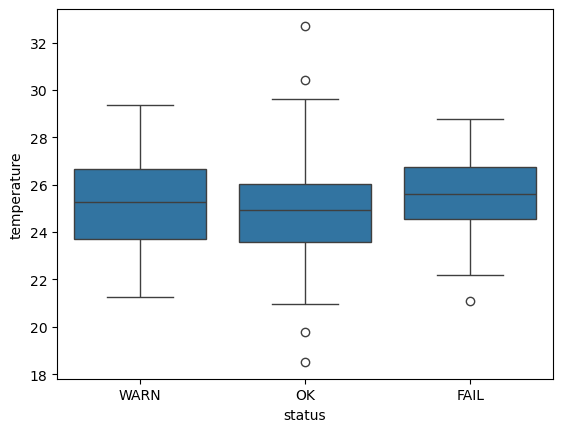

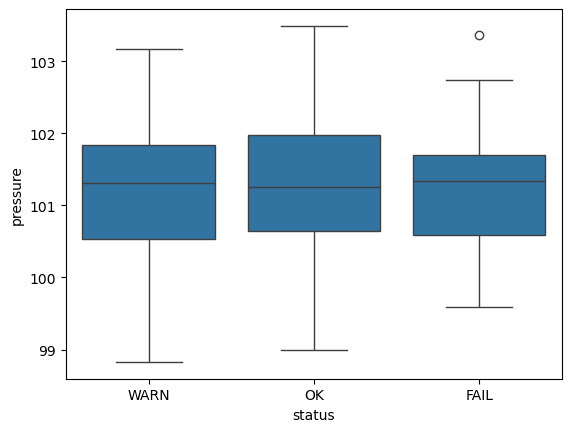

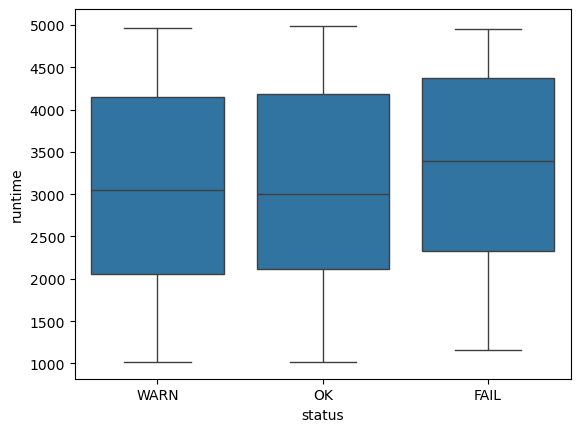

In [76]:
for col in ["temperature", "pressure", "runtime"]:
    sns.boxplot(data=df.reset_index(), x="status", y=col)
    plt.show()

### 2. Scatter plot efficiency vs vibration colored by status

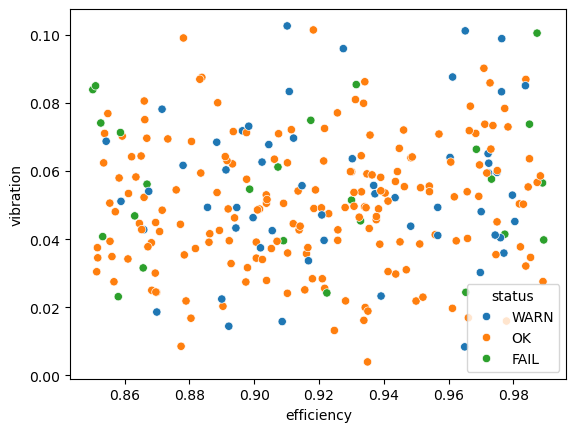

In [81]:
sns.scatterplot(data=df.reset_index(), x="efficiency", y="vibration", hue="status")
plt.show()

### 3. Temporal heatmap of mean temperature per sensor per month

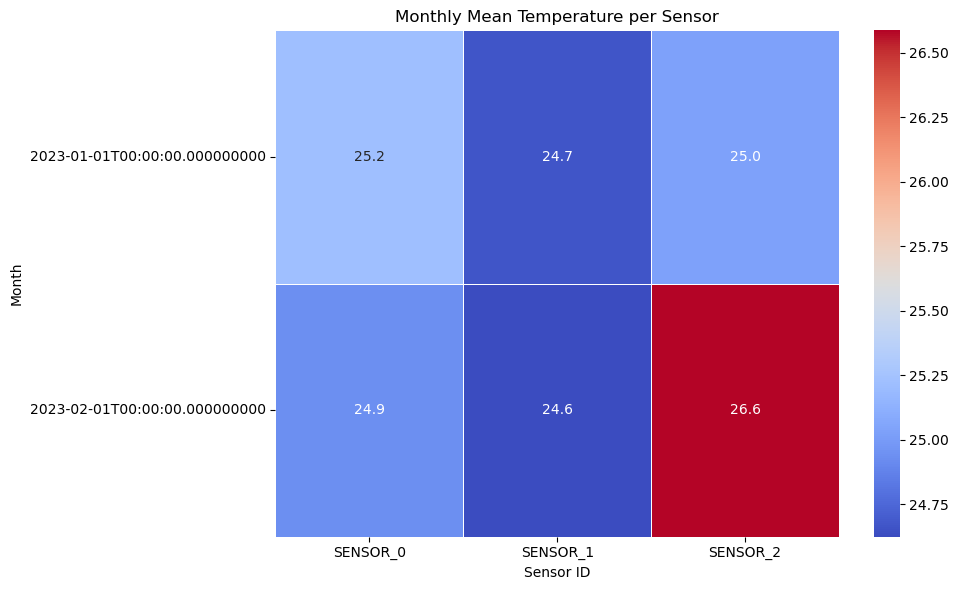

In [84]:
df_reset = df.reset_index()
df_reset["month"] = df_reset["datetime"].dt.to_period("M").dt.to_timestamp()
pivot_table = df_reset.pivot_table(index="month", columns="sensor_id", values="temperature", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)
plt.title("Monthly Mean Temperature per Sensor")
plt.ylabel("Month")
plt.xlabel("Sensor ID")
plt.tight_layout()
plt.show()

### 4. Pairwise scatterplots of top 4 correlated numeric features

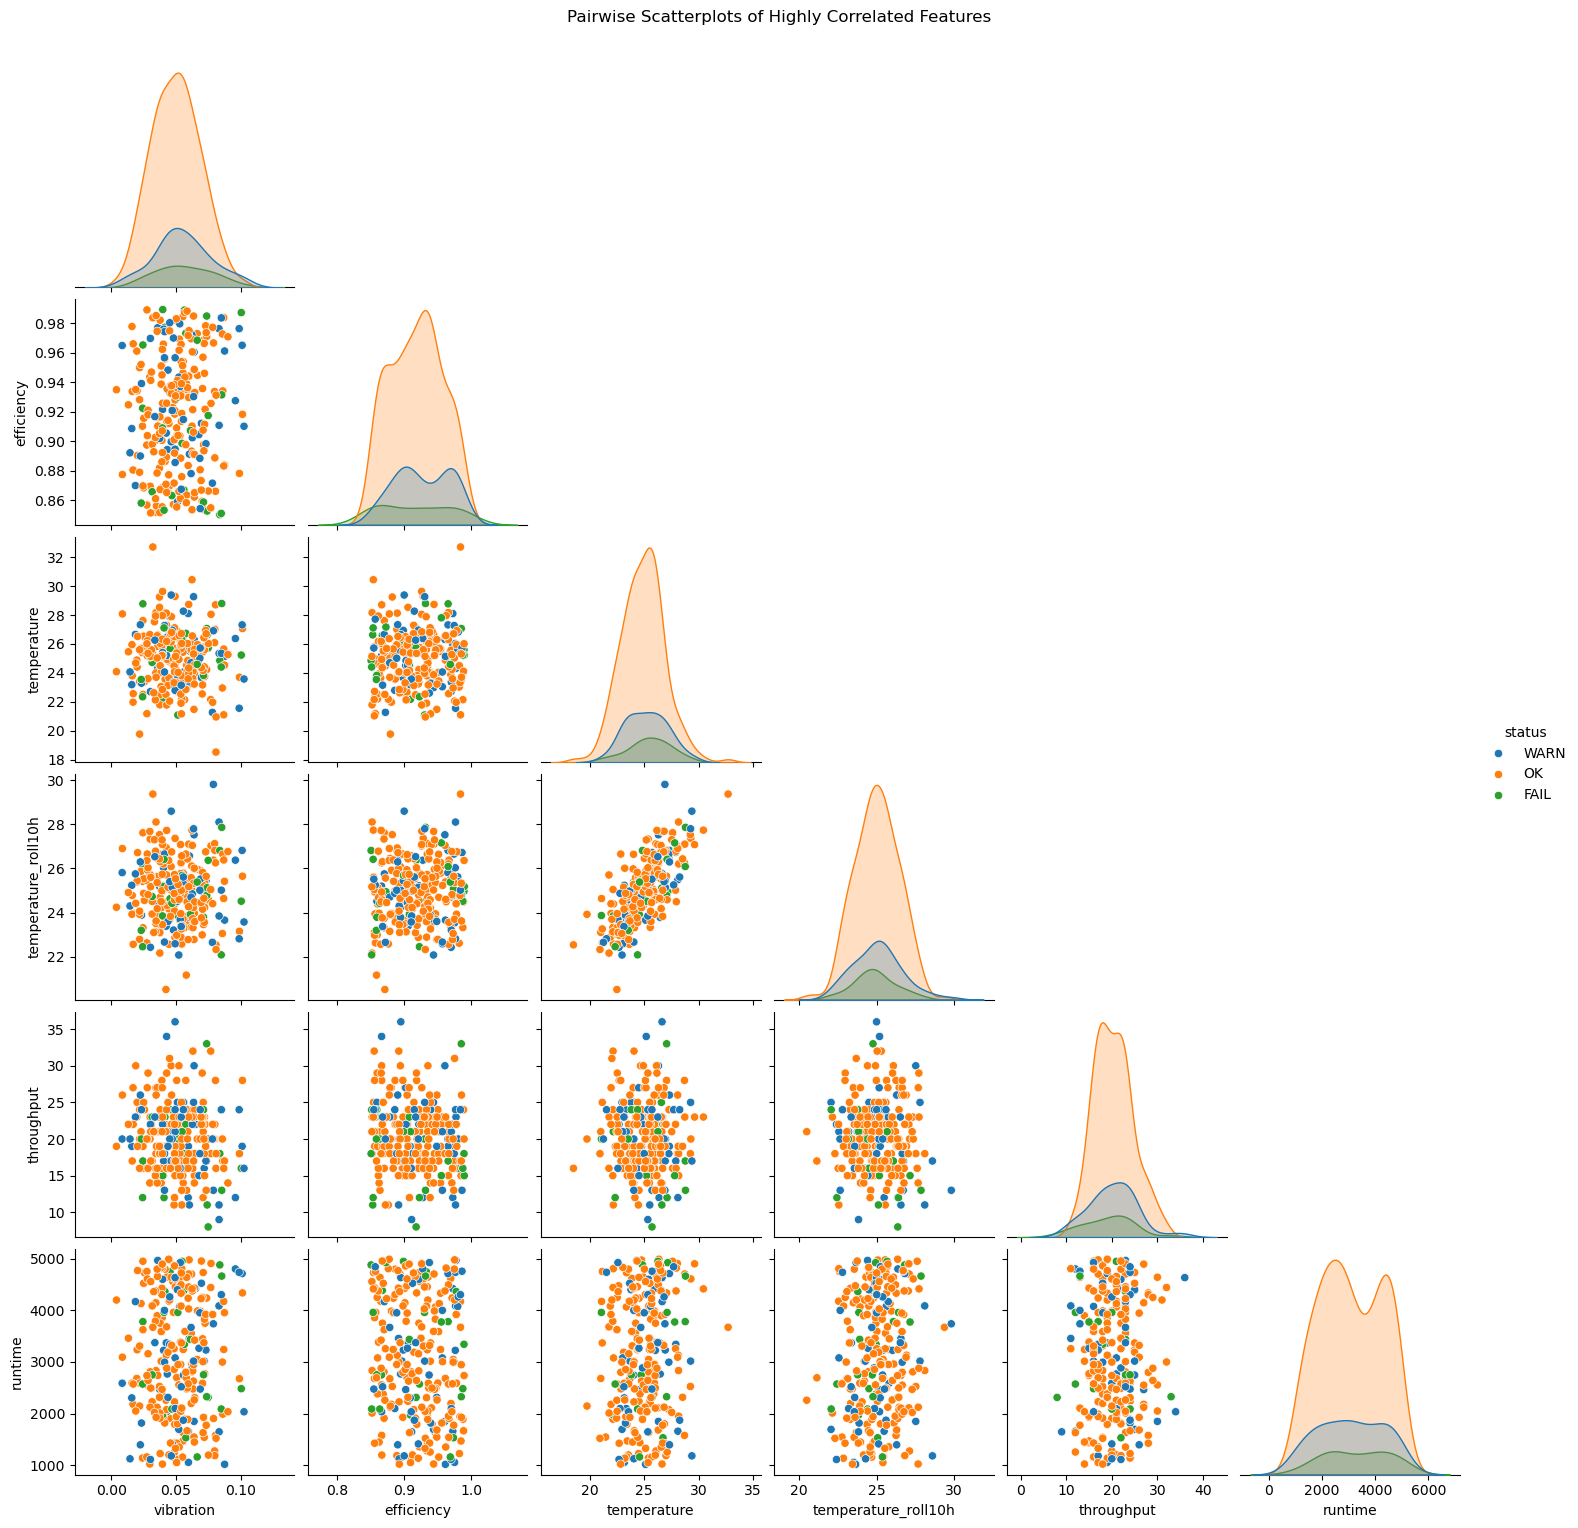

In [87]:
corr = df.select_dtypes(include="number").corr().abs()
np.fill_diagonal(corr.values, 0)
top_features = corr.unstack().sort_values(ascending=False).drop_duplicates().head(4).index
top_cols = list(set([x for pair in top_features for x in pair]))

sns.pairplot(df.reset_index(), vars=top_cols, hue="status", corner=True)
plt.suptitle("Pairwise Scatterplots of Highly Correlated Features", y=1.02)
plt.show()

## Part 3: Predict Status

- Features: All numerical sensor readings including: ["temperature", "humidity", "pressure", "vibration", "voltage", "current", "efficiency", "battery", "signal", "load"]

- Target: Status

- Train/Test split: Sort by date, use 80% of rows for training, 20% for testing

- Models: LogisticRegression, RandomForestClassifier, GradientBoostingClassifier

- Metrics:
    - Accuracy
    - F1 Score (Macro-average)
    - Precision (Macro-average)
    - Recall (Macro-average)
    - Confusion Matrix (Visualized)


C:\Users\kamiq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kamiq\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


LR Results:
Accuracy: 0.975609756097561
F1 (macro): 0.6616915422885572
Precision: 0.6568627450980392
Recall: 0.6666666666666666


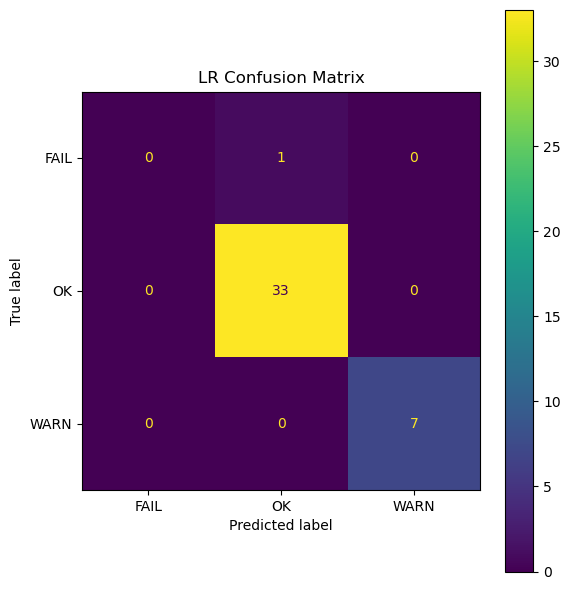

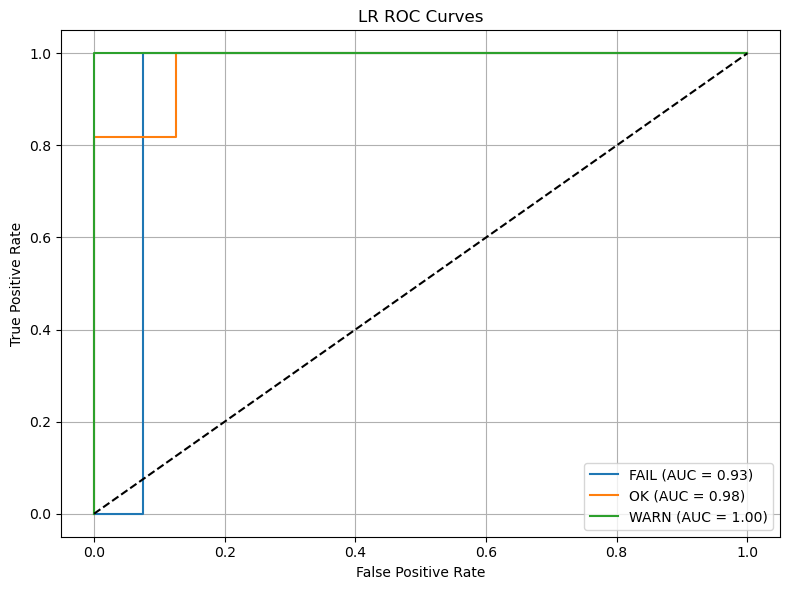


RF Results:
Accuracy: 1.0
F1 (macro): 1.0
Precision: 1.0
Recall: 1.0


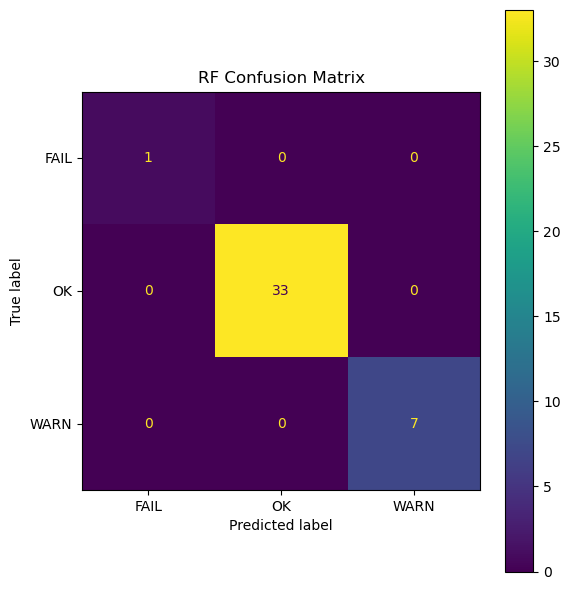

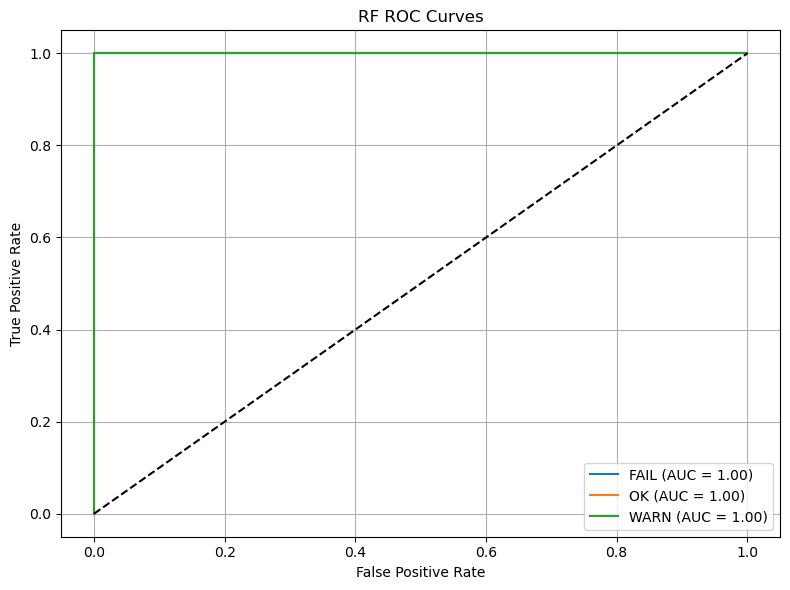


GB Results:
Accuracy: 1.0
F1 (macro): 1.0
Precision: 1.0
Recall: 1.0


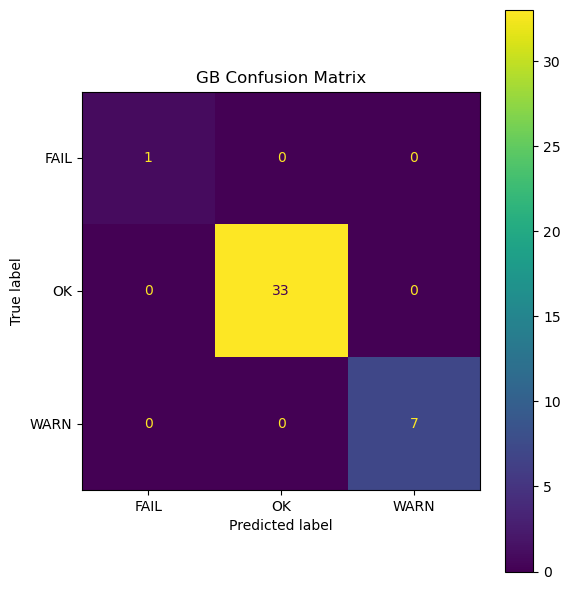

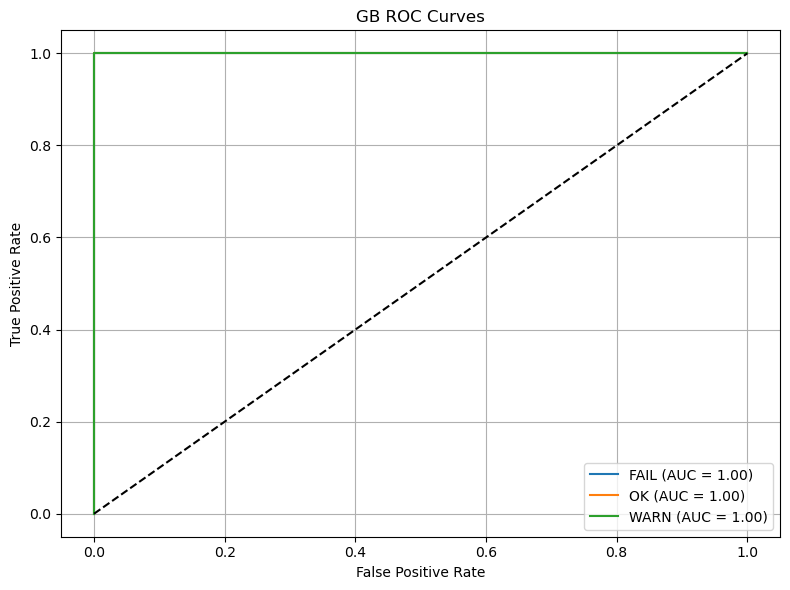

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

features = df.select_dtypes(include="number").columns
target = "status"

le = LabelEncoder()
df["status_encoded"] = le.fit_transform(df[target])
class_labels = le.classes_

train_df = df.iloc[:int(0.8 * len(df))].dropna()
test_df = df.iloc[int(0.8 * len(df)):].dropna()

X_train = train_df[features]
X_test = test_df[features]
y_train = train_df["status_encoded"]
y_test = test_df["status_encoded"]


models = {
    "LR": LogisticRegression(max_iter=1000),
    "RF": RandomForestClassifier(),
    "GB": GradientBoostingClassifier()
}

param_grids = {
    "LR": {},
    "RF": {"n_estimators": [100], "max_depth": [5]},
    "GB": {"n_estimators": [100], "max_depth": [5]}
}

tscv = TimeSeriesSplit(n_splits=5)

for name, model in models.items():
    gs = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=tscv, scoring="accuracy")
    gs.fit(X_train, y_train)
    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 (macro):", f1_score(y_test, y_pred, average="macro", zero_division=0))
    print("Precision:", precision_score(y_test, y_pred, average="macro", zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average="macro", zero_division=0))

    cm = confusion_matrix(y_test, y_pred, labels=range(len(class_labels)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    _, ax = plt.subplots(figsize=(6, 6))
    disp.plot(ax=ax)
    ax.set_title(f"{name} Confusion Matrix")
    plt.tight_layout()
    plt.show()

    if hasattr(best_model, "predict_proba"):
        y_score = best_model.predict_proba(X_test)
        y_test_bin = label_binarize(y_test, classes=range(len(class_labels)))

        plt.figure(figsize=(8, 6))
        for i in range(len(class_labels)):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"{class_labels[i]} (AUC = {roc_auc:.2f})")

        plt.plot([0, 1], [0, 1], "k--")
        plt.title(f"{name} ROC Curves")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.tight_layout()
        plt.show()